# 이항분류

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.classification import *
from hossam.tensor import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel(path="https://data.hossam.kr/mldata/dogs.xlsx", categories=['dog'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dog     200 non-null    category
 1   length  200 non-null    float64 
 2   height  200 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB
None

상위 5개 행
+----+-------+----------+----------+
|    | dog   |   length |   height |
|----+-------+----------+----------|
|  0 | d     |    55.01 |    29.27 |
|  1 | d     |    59.01 |    29.39 |
|  2 | d     |    56.53 |     28.5 |
|  3 | d     |    53.66 |     28.5 |
|  4 | d     |    49.67 |    31.97 |
+----+-------+----------+----------+

하위 5개 행
+-----+-------+----------+----------+
|     | dog   |   length |   height |
|-----+-------+----------+----------|
| 195 | j     |    50.95 |    52.37 |
| 196 | j     |    51.86 |     52.4 |
| 197 | j     |    54.24 |    47.82 |
| 198 | j     |    53.13 |    50.22 |
| 199 | j     |       53 |    5

## #02. 데이터 전처리

### [1] 종속변수 라벨링

분류를 수행할 경우 종속변수가 라벨링이 되어 있어야 하며, 데이터 타입이 정수 형태로 설정되어야 한다.

In [3]:
df = my_labelling(origin, 'dog')
df

+-------+---------+
| dog   |   label |
|-------+---------|
| d     |       0 |
| j     |       1 |
+-------+---------+


,dog,length,height
0,0,55.01,29.27
1,0,59.01,29.39
2,0,56.53,28.50
3,0,53.66,28.50
4,0,49.67,31.97
...,...,...,...
195,1,50.95,52.37
196,1,51.86,52.40
197,1,54.24,47.82
198,1,53.13,50.22


### [2] 훈련, 검증 데이터 분리

In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname='dog')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

## #03. 훈련 모델 적합

### [1] 모델 구성

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 분류 | 이항분류 | [relu,] sigmoid | rmsporp | binary_crossentropy | acc | 타이타닉 생존률 예측 |

In [6]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1], )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

### [2] 모델 학습

In [7]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), verbose=0, callbacks = [
    EarlyStopping(monitor = 'val_acc', patience=10, verbose = 0),
    ReduceLROnPlateau(monitor= "val_acc", patience=5, min_lr=0.0001, verbose=0)
])

### [3] 학습 곡선 확인

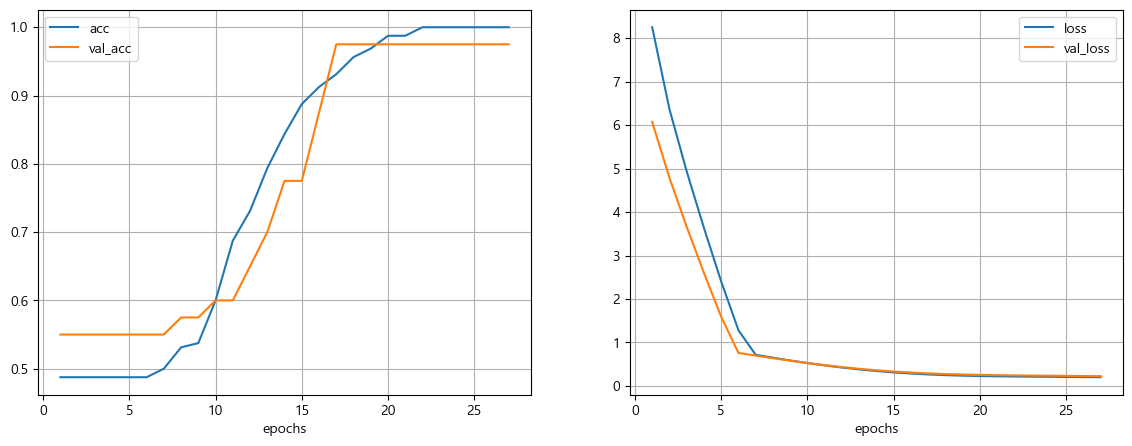

+----------+---------+----------+-----------+------------+-----------------+
|   epochs |     acc |     loss |   val_acc |   val_loss |   learning_rate |
|----------+---------+----------+-----------+------------+-----------------|
|        1 |  0.4875 |  8.25244 |      0.55 |     6.0727 |           0.001 |
|        2 |  0.4875 |  6.36636 |      0.55 |    4.78931 |           0.001 |
|        3 |  0.4875 |  4.93503 |      0.55 |    3.66093 |           0.001 |
|        4 |  0.4875 |  3.63542 |      0.55 |    2.60051 |           0.001 |
|        5 |  0.4875 |   2.4031 |      0.55 |    1.59157 |           0.001 |
|        6 |  0.4875 |  1.28203 |      0.55 |   0.758962 |           0.001 |
|        7 |     0.5 | 0.716022 |      0.55 |    0.69745 |          0.0001 |
|        8 | 0.53125 | 0.649407 |     0.575 |    0.63734 |          0.0001 |
|        9 |  0.5375 | 0.585679 |     0.575 |   0.579969 |          0.0001 |
|       10 |     0.6 | 0.526127 |       0.6 |   0.526337 |          0.0001 |

In [10]:
tf_result(result, history_table=True)

## #04. 성능평가

### [1] 검증 데이터에 대한 예측 결과 산정

sklearn의 경우 `predict()`의 결과가 1차 배열로 리턴되지만 tensor는 2차 배열로 리턴된다.

sklearn의 성능평가 함수를 활용하기 위해서는 `predict()`의 결과를 1차 배열로 변환해야 한다.

In [11]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
40개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.3289887 ]
 [0.89047444]
 [0.89814794]
 [0.2336504 ]
 [0.78656256]
 [0.9133703 ]
 [0.27470586]
 [0.70429206]
 [0.13620436]
 [0.8760095 ]
 [0.22278957]
 [0.9145753 ]
 [0.91462004]
 [0.92309064]
 [0.2822167 ]
 [0.2093751 ]
 [0.07963486]
 [0.8486828 ]
 [0.2765107 ]
 [0.3178046 ]
 [0.86014843]
 [0.8768594 ]
 [0.33333316]
 [0.8644084 ]
 [0.14555722]
 [0.65361965]
 [0.8124561 ]
 [0.8115044 ]
 [0.90680325]
 [0.16956243]
 [0.33193615]
 [0.18775997]
 [0.84554243]
 [0.8936702 ]
 [0.17666416]
 [0.884696  ]
 [0.88592803]
 [0.3124375 ]
 [0.5245739 ]
 [0.8036274 ]]


### [2] 예측결과를 1차 배열로 변환

> 이 내용을 모듈에 적용함

In [12]:
pred = test_pred.flatten()
pred

array([0.3289887 , 0.89047444, 0.89814794, 0.2336504 , 0.78656256,
       0.9133703 , 0.27470586, 0.70429206, 0.13620436, 0.8760095 ,
       0.22278957, 0.9145753 , 0.91462004, 0.92309064, 0.2822167 ,
       0.2093751 , 0.07963486, 0.8486828 , 0.2765107 , 0.3178046 ,
       0.86014843, 0.8768594 , 0.33333316, 0.8644084 , 0.14555722,
       0.65361965, 0.8124561 , 0.8115044 , 0.90680325, 0.16956243,
       0.33193615, 0.18775997, 0.84554243, 0.8936702 , 0.17666416,
       0.884696  , 0.88592803, 0.3124375 , 0.5245739 , 0.8036274 ],
      dtype=float32)

### [3] 분류 결과 확인

In [ ]:
#my_classification_result(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)